In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
data = pd.read_csv('./data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [5]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target feature. Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target values.

In [6]:
data.dropna(subset=['Price'], axis=0, inplace=True)
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
27243,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
27244,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
27245,Yarraville,12/37 Stephen St,3,h,1140000.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [7]:
geo_features = ['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

In [8]:
position_data.nunique()

Lattitude      11366
Longtitude     12275
CouncilArea       33
Address        26751
Suburb           345
dtype: int64

In [9]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(0)
    
cat_data = data[cat_feat]
num_data = data[num_feat]

/tmp/ipykernel_8640/1427316102.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f] = data[f].fillna(method='ffill')


(array([1.9047e+04, 6.9840e+03, 9.4400e+02, 1.8600e+02, 6.0000e+01,
        2.0000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

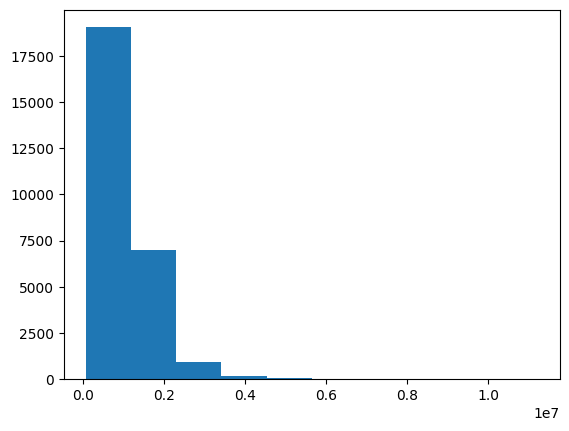

In [10]:
import matplotlib.pyplot as plt

plt.hist(data['Price'])

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range.

(array([ 740., 6040., 7178., 4152., 3093., 1652.,  920.,  571.,  332.,
         221.]),
 array([  85000.,  372500.,  660000.,  947500., 1235000., 1522500.,
        1810000., 2097500., 2385000., 2672500., 2960000.]),
 <BarContainer object of 10 artists>)

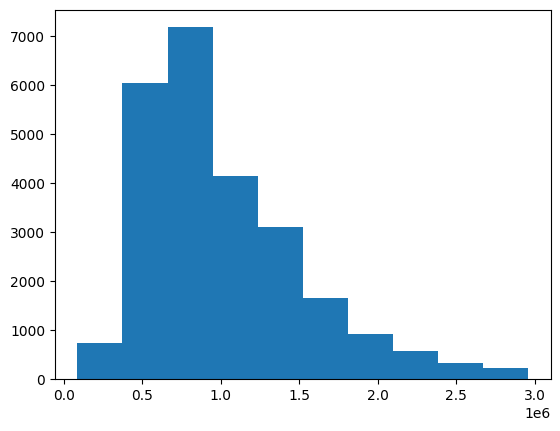

In [11]:
from scipy import stats

num_data = num_data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]
plt.hist(num_data['Price'])

Standardize numerical features and recombine data

In [12]:
print(geo_features)
data = pd.concat([num_data, cat_data.iloc[num_data.index]], axis=1).reset_index(drop=True)
position_data = position_data.iloc[num_data.index]

target = data['Price']
data.drop('Price', axis=1, inplace=True)
num_feat.remove('Price')

data

['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Type,Regionname
0,2,2.5,2.0,1.0,1.0,202.0,0.0,0.0,4019.0,h,Northern Metropolitan
1,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,h,Northern Metropolitan
2,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,h,Northern Metropolitan
3,3,2.5,3.0,2.0,1.0,94.0,0.0,0.0,4019.0,h,Northern Metropolitan
4,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,h,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...
24894,4,6.3,4.0,1.0,3.0,593.0,0.0,0.0,6543.0,h,Western Metropolitan
24895,2,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,6543.0,h,Western Metropolitan
24896,2,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,6543.0,t,Western Metropolitan
24897,3,6.3,0.0,0.0,0.0,0.0,0.0,0.0,6543.0,h,Western Metropolitan


## Data preprocessing

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = StandardScaler()
data[num_feat] = mm_scaler.fit_transform(data[num_feat])
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Type,Regionname
0,-1.038272,-1.425573,-0.173497,-0.196442,-0.206045,-0.242831,-0.655494,-0.886880,-0.805574,h,Northern Metropolitan
1,-1.038272,-1.425573,-0.173497,-0.196442,-1.186794,-0.337139,0.273447,1.059062,-0.805574,h,Northern Metropolitan
2,0.077960,-1.425573,0.498129,0.978481,-1.186794,-0.382242,1.108317,1.059062,-0.805574,h,Northern Metropolitan
3,0.077960,-1.425573,0.498129,0.978481,-0.206045,-0.464249,-0.655494,-0.886880,-0.805574,h,Northern Metropolitan
4,1.194193,-1.425573,0.498129,-0.196442,0.774705,-0.410945,1.014247,1.175818,-0.805574,h,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...
24894,1.194193,-0.764975,1.169755,-0.196442,1.755455,0.558781,-0.655494,-0.886880,-0.146824,h,Western Metropolitan
24895,-1.038272,-0.764975,-0.173497,0.978481,-0.206045,-0.456048,0.567415,1.179915,-0.146824,h,Western Metropolitan
24896,-1.038272,-0.764975,-0.173497,-0.196442,0.774705,-0.205929,0.755555,1.161480,-0.146824,t,Western Metropolitan
24897,0.077960,-0.764975,-1.516749,-1.371364,-1.186794,-0.656964,-0.655494,-0.886880,-0.146824,h,Western Metropolitan


One-hot encoding is applied to categorical features "Regionname" and "Type"

In [14]:
ohe = OneHotEncoder()

encoded_cat = ohe.fit_transform(data[cat_feat])
encoded_cat = pd.DataFrame(encoded_cat.todense(), columns=[str(i) for i in range(11)])
data.drop(cat_feat, axis=1, inplace=True)

data = pd.concat([data, encoded_cat], axis=1)
data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-1.038272,-1.425573,-0.173497,-0.196442,-0.206045,-0.242831,-0.655494,-0.886880,-0.805574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.038272,-1.425573,-0.173497,-0.196442,-1.186794,-0.337139,0.273447,1.059062,-0.805574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.077960,-1.425573,0.498129,0.978481,-1.186794,-0.382242,1.108317,1.059062,-0.805574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.077960,-1.425573,0.498129,0.978481,-0.206045,-0.464249,-0.655494,-0.886880,-0.805574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.194193,-1.425573,0.498129,-0.196442,0.774705,-0.410945,1.014247,1.175818,-0.805574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,1.194193,-0.764975,1.169755,-0.196442,1.755455,0.558781,-0.655494,-0.886880,-0.146824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24895,-1.038272,-0.764975,-0.173497,0.978481,-0.206045,-0.456048,0.567415,1.179915,-0.146824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24896,-1.038272,-0.764975,-0.173497,-0.196442,0.774705,-0.205929,0.755555,1.161480,-0.146824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24897,0.077960,-0.764975,-1.516749,-1.371364,-1.186794,-0.656964,-0.655494,-0.886880,-0.146824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


For feature "YearBuilt" - apply segmentation into bins

In [15]:
data['YearBuilt'] = pd.cut(data['YearBuilt'], bins=20, labels=range(20))

In [16]:
data.shape

(24899, 20)

Generate polynomial features for continuous data

In [17]:
from sklearn.preprocessing import PolynomialFeatures

pol_features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']

pol = PolynomialFeatures(degree=2, )
pol_extended = pol.fit_transform(data[pol_features])

data.drop(pol_features, axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(pol_extended, columns=[str(i) for i in range(pol_extended.shape[1])])], axis=1)

In [18]:
data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.058967,0.159175,-0.000000,0.195619,0.429672,-0.000000,0.528049,0.0,-0.000000,0.648949
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.113663,-0.092190,-6.068500,0.271590,0.074773,4.922041,-0.220282,324.0,-14.500329,0.648949
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.146109,-0.423646,-6.880364,0.307924,1.228367,19.949711,-0.892831,324.0,-14.500329,0.648949
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.215527,0.304312,-0.000000,0.373987,0.429672,-0.000000,0.528049,0.0,-0.000000,0.648949
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.168876,-0.416800,-7.807949,0.331046,1.028698,19.270700,-0.817051,361.0,-15.305902,0.648949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.312237,-0.366278,0.000000,-0.082043,0.429672,-0.000000,0.096242,0.0,-0.000000,0.021557
24895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.207980,-0.258769,-8.664916,0.066959,0.321960,10.780890,-0.083310,361.0,-2.789661,0.021557
24896,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.042407,-0.155590,-3.912643,0.030235,0.570863,14.355547,-0.110934,361.0,-2.789661,0.021557
24897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.431602,0.430636,-0.000000,0.096458,0.429672,-0.000000,0.096242,0.0,-0.000000,0.021557


## Modelling

In [19]:
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso, ElasticNetCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=42)

In [20]:
import warnings
warnings.filterwarnings(action='ignore')

model_1 = LinearRegression().fit(X_train, y_train)
model_2 = RidgeCV(alphas=np.linspace(0.05, 0.5, 10), cv=5).fit(X_train, y_train)
model_3 = Lasso(alpha=0.1).fit(X_train, y_train)
model_4 = ElasticNetCV(alphas=np.linspace(0.05, 1, 10), l1_ratio=0.5).fit(X_train, y_train)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MSE Regression: \tR^2 score = {model_1.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_1.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_1.predict(X_test)):.4e}')
print(f'Ridge Regression: \tR^2 score = {model_2.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_2.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_2.predict(X_test)):.4e}')      
print(f'Lasso Regression: \tR^2 score = {model_3.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_3.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_3.predict(X_test)):.4e}')      
print(f'ElasticNet: \t\tR^2 score = {model_4.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, model_4.predict(X_test)):.4e} | MAE = {mean_absolute_error(y_test, model_4.predict(X_test)):.4e}')      

MSE Regression: 	R^2 score = 0.6545 | MSE = 8.9106e+10 | MAE = 2.2156e+05
Ridge Regression: 	R^2 score = 0.6545 | MSE = 8.9105e+10 | MAE = 2.2156e+05
Lasso Regression: 	R^2 score = 0.6507 | MSE = 9.0080e+10 | MAE = 2.2281e+05
ElasticNet: 		R^2 score = 0.6486 | MSE = 9.0619e+10 | MAE = 2.2225e+05
